In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
DEVICE    

device(type='cuda')

In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [5]:
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',train=True, download = True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',train=False, download = True, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset,batch_size=BATCH_SIZE,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
for data,label in  train_dataset:
  print(data.shape)
  break

torch.Size([3, 32, 32])


In [12]:
# 모델 설계
class Net(nn.Module):
  def __init__(self) -> None:
     super().__init__()
     self.fc1 = nn.Linear(3*32*32,512)
     self.fc2 = nn.Linear(512,256)
     self.fc3 = nn.Linear(256,10)
  def forward(self, x):
    x = x.view(-1,3*32*32)
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    x = torch.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x  

In [13]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [29]:
from tqdm import tqdm
def train(model, train_loader, optimizer):
  model.train() # 학습
  # 모델 성능 확인
  for batch_idx, (data,label) in tqdm(enumerate(train_loader)):
    data = data.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # 출력
    # output_str =  f"train epoch : {batch_idx} {len(data)}/{len(train_loader.dataset):.0f} train_loss : {loss.item():.6f}"
    # print(output_str)

In [30]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(DEVICE)
      label = label.to(DEVICE)
      output = model(data)
      test_loss += criterion(output,label).item()
      prediction = output.max(1, keepdim =True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()
  test_loss /= len(test_loader.dataset)
  test_accuracy = 100.*correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [31]:
# 학습

In [32]:
for epoch in range(1, EPOCHS+1):
  train(model,train_loader,optimizer)
  test_loss, test_accuracy =  evaluate(model, test_loader)
  print(f"EPOCH:{epoch} , test loss:{test_loss:.4f}, test Accuracy:{test_accuracy:.2f}")


1563it [00:08, 191.76it/s]


EPOCH:1 , test loss:0.0505, test Accuracy:42.43


1563it [00:08, 190.37it/s]


EPOCH:2 , test loss:0.0482, test Accuracy:45.22


1563it [00:08, 190.03it/s]


EPOCH:3 , test loss:0.0480, test Accuracy:45.72


1563it [00:08, 189.57it/s]


EPOCH:4 , test loss:0.0479, test Accuracy:45.42


1563it [00:08, 189.00it/s]


EPOCH:5 , test loss:0.0458, test Accuracy:47.76


1563it [00:08, 190.83it/s]


EPOCH:6 , test loss:0.0465, test Accuracy:46.78


1563it [00:08, 188.90it/s]


EPOCH:7 , test loss:0.0458, test Accuracy:48.38


1563it [00:08, 192.97it/s]


EPOCH:8 , test loss:0.0458, test Accuracy:48.29


1563it [00:08, 191.78it/s]


EPOCH:9 , test loss:0.0475, test Accuracy:46.43


1563it [00:08, 187.31it/s]


EPOCH:10 , test loss:0.0448, test Accuracy:49.44


In [46]:
# 실제 데이터와 모델이 예측한 이미지 비교해보기
sampleDatas = []
for idx,datas in enumerate(test_dataset):
  if idx > 10: break
  sampleDatas.append(datas)  

In [43]:
image = np.transpose(image,axes=(1,2,0))
image.shape

torch.Size([32, 32, 3])

(<matplotlib.image.AxesImage at 0x7f83c120bb50>, 3)

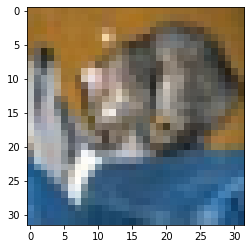

In [45]:
plt.imshow(image), label


In [39]:
help(image.view)

Help on built-in function view:

view(...) method of torch.Tensor instance
    view(*shape) -> Tensor
    
    Returns a new tensor with the same data as the :attr:`self` tensor but of a
    different :attr:`shape`.
    
    The returned tensor shares the same data and must have the same number
    of elements, but may have a different size. For a tensor to be viewed, the new
    view size must be compatible with its original size and stride, i.e., each new
    view dimension must either be a subspace of an original dimension, or only span
    across original dimensions :math:`d, d+1, \dots, d+k` that satisfy the following
    contiguity-like condition that :math:`\forall i = d, \dots, d+k-1`,
    
    .. math::
    
      \text{stride}[i] = \text{stride}[i+1] \times \text{size}[i+1]
    
    Otherwise, it will not be possible to view :attr:`self` tensor as :attr:`shape`
    without copying it (e.g., via :meth:`contiguous`). When it is unclear whether a
    :meth:`view` can be performe